# Urban Informatics for Smart, Sustainable Cities
## Assignment 3
### By Kaylyn Levine (kal573)
### Data used in this analysis can be found at my GitHub: kaylevine

#### Set working environment and import packages

In [1]:
import pandas as pd
import geopandas as gp
from geopandas import GeoDataFrame
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import pysal as ps
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### A note on importing the raw data:
When I imported the data directly as an excel file, it replaced all column values with NaN. Therefore, I removed unneeded columns in excel and saved the file as a csv. I then imported this csv file into my notebook.
All datasets, with links to original sources, are posted on GitHub.

#### Local Law 84 Data:
Includes BINs, Type of Builidngs, Energy Star Score, Source EUI, and BBL

In [2]:
data = pd.read_csv('LL84.csv')

In [3]:
data.columns

Index([u'BINs', u'Type', u'Score', u'S_EUI', u'BBL'], dtype='object')

In [4]:
data.dropna(inplace=True)

In [5]:
data.head()

,BINs,Type,Score,S_EUI,BBL
0,1088884,Multifamily Housing,87.0,115.7,1.003360e+09
1,1026728,Multifamily Housing,79.0,107.1,1.010618e+09
2,1043974,Multifamily Housing,80.0,105.2,1.014270e+09
3,1048117,Multifamily Housing,10.0,180.7,1.015180e+09
5,1000005,Office,71.0,300.2,1.000048e+09


In [6]:
data.Type.unique()

array(['Multifamily Housing', 'Office', 'Hotel', 'K-12 School',
       'Financial Office', 'Mixed Use Property',
       'Residence Hall/Dormitory', 'Hospital (General Medical & Surgical)',
       'Non-Refrigerated Warehouse', 'Retail Store', 'Medical Office',
       'Senior Care Community', 'Distribution Center', 'Other',
       'Fitness Center/Health Club/Gym', 'Data Center', 'Worship Facility',
       'Manufacturing/Industrial Plant', 'Refrigerated Warehouse',
       'Other - Specialty Hospital', 'Parking',
       'Supermarket/Grocery Store', 'Wholesale Club/Supercenter',
       'Courthouse', 'Residential Care Facility'], dtype=object)

#### I selected buildings only with the following types assigned, which include office buildings, warehouses, plants, and centers.

In [7]:
buildings = data.loc[data['Type'].isin(['Office', 'Financial Office', 'Non-Refrigerated Warehouse', 'Medical Office', 'Distribution Center', 'Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse'])]
buildings.head()

,BINs,Type,Score,S_EUI,BBL
5,1000005,Office,71.0,300.2,1.000048e+09
6,1000007,Office,90.0,161.3,1.000050e+09
7,1000006,Office,71.0,243.1,1.000058e+09
9,1000018,Office,86.0,183.5,1.000090e+09
10,1000020,Office,77.0,204.5,1.000090e+09


In [8]:
len(buildings)

1174

In [9]:
buildings.S_EUI.median()

177.2

In [10]:
# remove outliers from S_EUI column for accurate histogram plotting
buildings = buildings[buildings['S_EUI'] <= 800]

#### Plot Histogram of LL84 Data (Building Data)

(array([  19.,   36.,   49.,   41.,   38.,   54.,  105.,  112.,  132.,
         142.,  108.,   86.,   64.,   49.,   28.,   17.,   17.,   18.,
           4.,    9.,    5.,    4.,    3.,    2.,    4.,    1.,    1.,
           0.,    0.,    0.,    3.,    0.,    0.,    1.,    1.,    0.,
           2.,    1.,    0.,    3.]),
 array([   1.7 ,   21.18,   40.66,   60.14,   79.62,   99.1 ,  118.58,
         138.06,  157.54,  177.02,  196.5 ,  215.98,  235.46,  254.94,
         274.42,  293.9 ,  313.38,  332.86,  352.34,  371.82,  391.3 ,
         410.78,  430.26,  449.74,  469.22,  488.7 ,  508.18,  527.66,
         547.14,  566.62,  586.1 ,  605.58,  625.06,  644.54,  664.02,
         683.5 ,  702.98,  722.46,  741.94,  761.42,  780.9 ]),
 <a list of 40 Patch objects>)

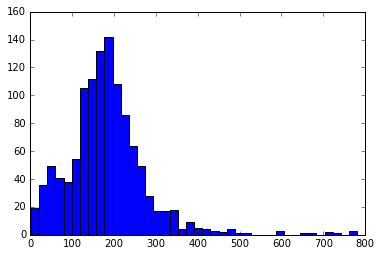

In [11]:
pl.hist(buildings.S_EUI, bins = 40)

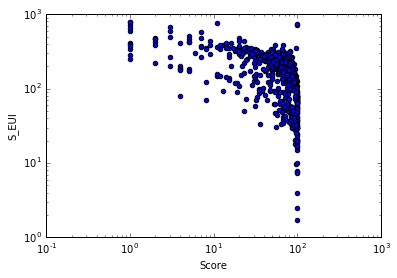

In [12]:
buildings.plot(x='Score', y='S_EUI', kind='scatter', loglog=True)

#### 10 Buildings with the highest Source EUI

In [13]:
buildings.sort_values(by='S_EUI', ascending=True, inplace=True)
buildings.head(10)

,BINs,Type,Score,S_EUI,BBL
7647,3027840,Non-Refrigerated Warehouse,100.0,1.7,3.011360e+09
9929,4003411,Office,100.0,2.5,4.002390e+09
11009,4100545,Office,100.0,4.0,4.042730e+09
10721,4445984,Non-Refrigerated Warehouse,100.0,7.3,4.026110e+09
7578,3011467,Non-Refrigerated Warehouse,100.0,7.7,3.007450e+09
9977,4441780,Office,100.0,7.9,4.003660e+09
5433,2101893,Non-Refrigerated Warehouse,96.0,9.8,2.023870e+09
10737,4059918,Non-Refrigerated Warehouse,98.0,10.1,4.026780e+09
303,1002856,Office,100.0,14.8,1.002220e+09
8210,3346084:3846399,Distribution Center,99.0,16.4,3.029790e+09


#### 10 Buildings with the lowest Source EUI

In [14]:
buildings.tail(10)

,BINs,Type,Score,S_EUI,BBL
1904,1022549,Medical Office,3.0,586.8,1.009690e+09
432,1006510,Medical Office,1.0,603.8,1.004550e+09
1206,1015157,Office,1.0,647.0,1.008060e+09
2899,1082746; 1081145,Office,3.0,670.8,1.012858e+09
818,1012277,Office,1.0,708.3,1.006870e+09
269,1002192,Office,100.0,716.4,1.001920e+09
1828,1019951,Data Center,100.0,730.7,1.009118e+09
3680,1045589;1088793,Medical Office,11.0,766.5,1.014648e+09
1687,1018032,Office,1.0,776.5,1.008780e+09
55,1078982,Financial Office,1.0,780.9,1.000230e+09


#### Import and Clean Health Data:
Asthma Related Emergency Department Visits per Zip Code

In [15]:
#import asthma data for manhattan
a_manhattan = pd.read_csv('ny_asthma.csv')
a_bronx = pd.read_csv('bronx_asthma.csv')
a_brooklyn = pd.read_csv('brooklyn_asthma.csv')
a_queens = pd.read_csv('queens_asthma.csv')
a_si = pd.read_csv('si_asthma.csv')

#### Import and Clean Pluto Data:
This data will be used to merge datasets.
It contains BBL and ZipCode identifiers that will be used in this analysis

In [16]:
#import pluto data to merge asthma and building energy use data
pluto_manhattan = pd.read_csv('MN.csv')
pluto_bronx = pd.read_csv('BX.csv')
pluto_brooklyn = pd.read_csv('BK.csv')
pluto_queens = pd.read_csv('QN.csv')
pluto_si = pd.read_csv('SI.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,23,24,25,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,63,64,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interacti

In [17]:
pluto_manhattan = pluto_manhattan.loc[:,['ZipCode', 'BBL', "UnitsTotal", "YearBuilt", "Tract2010", 'XCoord', 'YCoord']]
pluto_bronx = pluto_bronx.loc[:,['ZipCode', 'BBL', "UnitsTotal", "YearBuilt", "Tract2010", 'XCoord', 'YCoord']]
pluto_brooklyn = pluto_brooklyn.loc[:,['ZipCode', 'BBL', "UnitsTotal", "YearBuilt", "Tract2010", 'XCoord', 'YCoord']]
pluto_queens = pluto_queens.loc[:,['ZipCode', 'BBL', "UnitsTotal", "YearBuilt", "Tract2010", 'XCoord', 'YCoord']]
pluto_si = pluto_si.loc[:,['ZipCode', 'BBL', "UnitsTotal", "YearBuilt", "Tract2010", 'XCoord', 'YCoord']]

In [18]:
pluto_manhattan = pluto_manhattan.rename(columns = {'ZipCode': 'ZIP'})
pluto_bronx = pluto_bronx.rename(columns = {'ZipCode': 'ZIP'})
pluto_brooklyn = pluto_brooklyn.rename(columns = {'ZipCode': 'ZIP'})
pluto_queens = pluto_queens.rename(columns = {'ZipCode': 'ZIP'})
pluto_si = pluto_si.rename(columns = {'ZipCode': 'ZIP'})

In [19]:
#merge pluto and asthma data first
merge_pa_manhattan = pd.merge(a_manhattan, pluto_manhattan, how="inner", on = "ZIP")
merge_pa_bronx = pd.merge(a_bronx, pluto_bronx, how="inner", on = "ZIP")
merge_pa_brooklyn = pd.merge(a_brooklyn, pluto_brooklyn, how="inner", on = "ZIP")
merge_pa_queens = pd.merge(a_queens, pluto_queens, how="inner", on = "ZIP")
merge_pa_si = pd.merge(a_si, pluto_si, how="inner", on = "ZIP")

In [20]:
#now merge with building data
merge_manhattan = pd.merge(buildings, merge_pa_manhattan, how="inner", on = "BBL")
merge_bronx = pd.merge(buildings, merge_pa_bronx, how="inner", on = "BBL")
merge_brooklyn = pd.merge(buildings, merge_pa_brooklyn, how="inner", on = "BBL")
merge_queens = pd.merge(buildings, merge_pa_queens, how="inner", on = "BBL")
merge_si = pd.merge(buildings, merge_pa_si, how="inner", on = "BBL")

In [22]:
m1 = merge_manhattan.append(merge_bronx)

In [23]:
m2 = m1.append(merge_brooklyn)

In [24]:
m3 = m2.append(merge_queens)

In [25]:
m4 = m3.append(merge_si)

#### Final merged and cleaned dataset:

In [26]:
merge_nyc = m4
merge_nyc.head()

,BINs,Type,Score,S_EUI,BBL,ZIP,ED_Visits,UnitsTotal,YearBuilt,Tract2010,XCoord,YCoord
0,1002856,Office,100.0,14.8,1.002220e+09,10013,165,53,1905,39,981721.0,202707.0
1,1007564,Office,100.0,24.6,1.004970e+09,10012,161,17,1900,43,984843.0,202807.0
2,1017813,Office,100.0,35.1,1.008710e+09,10003,878,13,1912,50,987653.0,207058.0
3,1009620,Office,100.0,36.8,1.005760e+09,10011,588,1,1924,63,985693.0,207061.0
4,1015025,Office,100.0,40.3,1.008010e+09,10001,794,26,1911,91,986165.0,210795.0


#### Average Source EUI by Zip Code

In [27]:
#group Source EUI by ZIP
avg_S_EUI = merge_nyc.groupby('ZIP').mean()['S_EUI']
avg_S_EUI.head()

ZIP
10001    167.945783
10002    257.400000
10003    198.814286
10004    220.340909
10005    251.300000
Name: S_EUI, dtype: float64

In [28]:
S_EUI = avg_S_EUI.reset_index()
S_EUI.columns = ['ZIP', 'avg']
S_EUI.head()

,ZIP,avg
0,10001,167.945783
1,10002,257.400000
2,10003,198.814286
3,10004,220.340909
4,10005,251.300000


In [29]:
avg_merge = pd.merge(merge_nyc, S_EUI, how = 'outer', on = 'ZIP')
avg_merge.head()

,BINs,Type,Score,S_EUI,BBL,ZIP,ED_Visits,UnitsTotal,YearBuilt,Tract2010,XCoord,YCoord,avg
0,1002856,Office,100.0,14.8,1.002220e+09,10013,165,53,1905,39,981721.0,202707.0,213.576923
1,1002017,Non-Refrigerated Warehouse,53.0,63.1,1.001790e+09,10013,165,11,1915,33,982221.0,201199.0,213.576923
2,1009745,Office,96.0,113.5,1.005790e+09,10013,165,2,1900,37,982525.0,203741.0,213.576923
3,1076084,Office,91.0,115.9,1.005958e+09,10013,165,18,1930,37,981634.0,203596.0,213.576923
4,Not Available,Office,92.0,116.5,1.002200e+09,10013,165,1,1915,33,982089.0,202468.0,213.576923


In [30]:
avg_merge.drop_duplicates('ZIP')

,BINs,Type,Score,S_EUI,BBL,ZIP,ED_Visits,UnitsTotal,YearBuilt,Tract2010,XCoord,YCoord,avg
0,1002856,Office,100.0,14.8,1.002220e+09,10013,165,53,1905,39,981721.0,202707.0,213.576923
26,1007564,Office,100.0,24.6,1.004970e+09,10012,161,17,1900,43,984843.0,202807.0,186.565217
49,1017813,Office,100.0,35.1,1.008710e+09,10003,878,13,1912,50,987653.0,207058.0,198.814286
84,1009620,Office,100.0,36.8,1.005760e+09,10011,588,1,1924,63,985693.0,207061.0,202.364865
121,1015025,Office,100.0,40.3,1.008010e+09,10001,794,26,1911,91,986165.0,210795.0,167.945783
204,Not Available,Office,100.0,41.1,1.012590e+09,10036,552,1,1900,96,989419.0,214389.0,219.822034
263,1016935,Office,100.0,47.3,1.008590e+09,10016,1430,16,1913,74,988787.0,210525.0,194.026829
345,1059889,Office,100.0,49.5,1.019950e+09,10027,5010,2,1934,211,995445.0,236744.0,149.155556
354,1035481,Office,100.0,52.6,1.012878e+09,10022,161,263,1973,102,990876.0,215857.0,227.750562
443,1015967,Office,100.0,62.3,1.008390e+09,10018,84,22,1920,84,988607.0,212904.0,160.264103


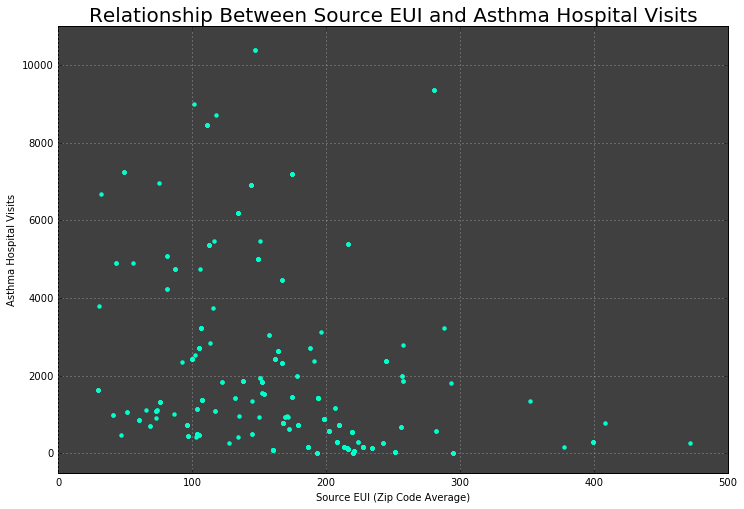

In [79]:
# exploratory scatterplots
ax = avg_merge.plot(x = 'avg', y = 'ED_Visits', kind = 'scatter', lw=0, figsize = (12,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Asthma Hospital Visits')
pl.xlabel('Source EUI (Zip Code Average)')
pl.grid(color = '#e6e6e6')
pl.xlim(0, 500)
pl.ylim(-500, 11000)
pl.title("Relationship Between Source EUI and Asthma Hospital Visits", fontsize = 20)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           1.03e-38
Time:                        08:28:22   Log-Likelihood:                -6046.8
No. Observations:                1148   AIC:                         1.210e+04
Df Residuals:                    1146   BIC:                         1.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    194.6988      1.672    116.481      0.000       191.419   197.978
ED_Visits     -0.0123      0.001    -13.512      0.000        -0.014    -0.010
==============================================================================
Omnibus:                      113.532   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              678.823
Skew:                           0.208   Prob(JB):                    3.94e-148
Kurtosis:                       6.744   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

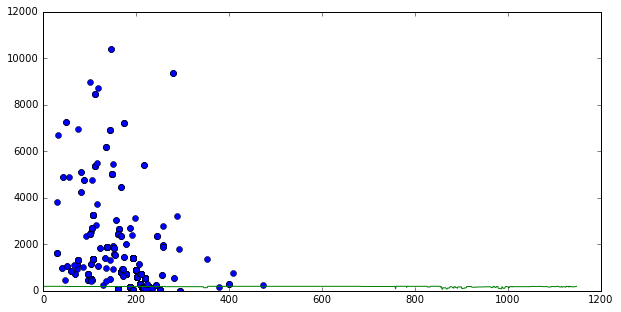

In [32]:
#regression
# fit line to data
linmodel_1 = smf.ols(formula = 'avg ~ ED_Visits', data = avg_merge).fit()

#plot
ax = pl.figure(figsize=(10,5)).add_subplot(111)
ax.plot(avg_merge['avg'], avg_merge['ED_Visits'], 'o', label="xxx")

ax.plot(linmodel_1.predict())

#fit summary
linmodel_1.summary()

#### Spatial Analysis

In [39]:
#import zip code shapefile for nyc
#map these three variables for exploratory analysis (asthma, S_EUI, and score)
#create a model to visualize all three together on the map 

#### Income Data: 
Downloaded from American FactFinder ACS 2015
DP03 - SELECTED ECONOMIC CHARACTERISTICS

In [40]:
income = pd.read_csv('income_data/income_data.csv')

,Id,Id2,code,med_inc,ZIP
0,8600000US06390,6390.0,ZCTA5 06390,151083.0,6390.0
1,8600000US10001,10001.0,ZCTA5 10001,86801.0,10001.0
2,8600000US10002,10002.0,ZCTA5 10002,33726.0,10002.0
3,8600000US10003,10003.0,ZCTA5 10003,98151.0,10003.0
4,8600000US10004,10004.0,ZCTA5 10004,119691.0,10004.0


In [42]:
income_merge_EUI = pd.merge(avg_merge, income, how = 'outer', on = 'ZIP')
income_merge_EUI.head()

,BINs,Type,Score,S_EUI,BBL,ZIP,ED_Visits,UnitsTotal,YearBuilt,Tract2010,XCoord,YCoord,avg,Id,Id2,code,med_inc
0,1002856,Office,100.0,14.8,1.002220e+09,10013.0,165.0,53.0,1905.0,39.0,981721.0,202707.0,213.576923,8600000US10013,10013.0,ZCTA5 10013,96667.0
1,1002017,Non-Refrigerated Warehouse,53.0,63.1,1.001790e+09,10013.0,165.0,11.0,1915.0,33.0,982221.0,201199.0,213.576923,8600000US10013,10013.0,ZCTA5 10013,96667.0
2,1009745,Office,96.0,113.5,1.005790e+09,10013.0,165.0,2.0,1900.0,37.0,982525.0,203741.0,213.576923,8600000US10013,10013.0,ZCTA5 10013,96667.0
3,1076084,Office,91.0,115.9,1.005958e+09,10013.0,165.0,18.0,1930.0,37.0,981634.0,203596.0,213.576923,8600000US10013,10013.0,ZCTA5 10013,96667.0
4,Not Available,Office,92.0,116.5,1.002200e+09,10013.0,165.0,1.0,1915.0,33.0,982089.0,202468.0,213.576923,8600000US10013,10013.0,ZCTA5 10013,96667.0


In [44]:
income_clean = income_merge_EUI.drop_duplicates('ZIP')

In [45]:
income_clean.head()

,BINs,Type,Score,S_EUI,BBL,ZIP,ED_Visits,UnitsTotal,YearBuilt,Tract2010,XCoord,YCoord,avg,Id,Id2,code,med_inc
0,1002856,Office,100.0,14.8,1.002220e+09,10013.0,165.0,53.0,1905.0,39.0,981721.0,202707.0,213.576923,8600000US10013,10013.0,ZCTA5 10013,96667.0
26,1007564,Office,100.0,24.6,1.004970e+09,10012.0,161.0,17.0,1900.0,43.0,984843.0,202807.0,186.565217,8600000US10012,10012.0,ZCTA5 10012,100859.0
49,1017813,Office,100.0,35.1,1.008710e+09,10003.0,878.0,13.0,1912.0,50.0,987653.0,207058.0,198.814286,8600000US10003,10003.0,ZCTA5 10003,98151.0
84,1009620,Office,100.0,36.8,1.005760e+09,10011.0,588.0,1.0,1924.0,63.0,985693.0,207061.0,202.364865,8600000US10011,10011.0,ZCTA5 10011,109818.0
121,1015025,Office,100.0,40.3,1.008010e+09,10001.0,794.0,26.0,1911.0,91.0,986165.0,210795.0,167.945783,8600000US10001,10001.0,ZCTA5 10001,86801.0


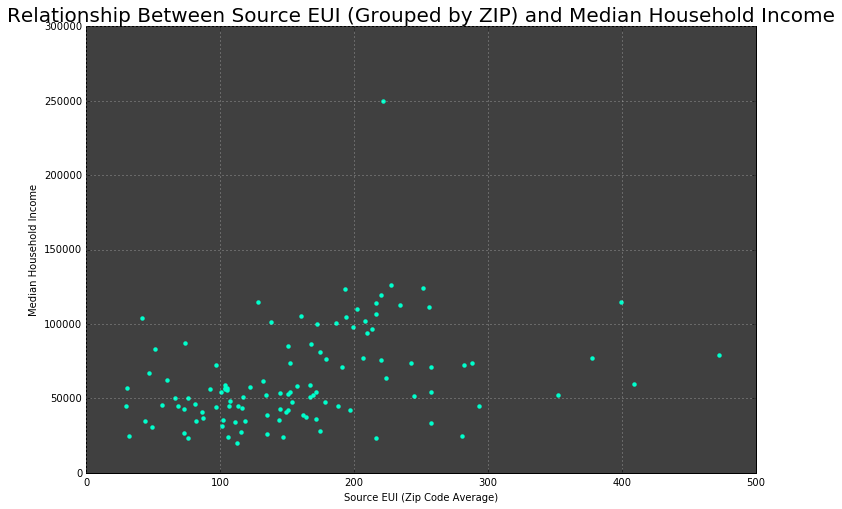

In [46]:
# exploratory scatterplots
ax = income_clean.plot(x = 'avg', y = 'med_inc', kind = 'scatter', lw=0, figsize = (12,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Median Household Income')
pl.xlabel('Source EUI (Zip Code Average)')
pl.grid(color = '#e6e6e6')
#pl.xlim(0, 500)
#pl.ylim(-500, 11000)
pl.title("Relationship Between Source EUI (Grouped by ZIP) and Median Household Income", fontsize = 20)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     15.42
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           0.000151
Time:                        08:28:24   Log-Likelihood:                -645.72
No. Observations:                 112   AIC:                             1295.
Df Residuals:                     110   BIC:                             1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    104.2840     15.992      6.521      0.000        72.592   135.976
med_inc        0.0009      0.000      3.926      0.000         0.000     0.001
==============================================================================
Omnibus:                       30.476   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.138
Skew:                           1.198   Prob(JB):                     4.77e-12
Kurtosis:                       5.331   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

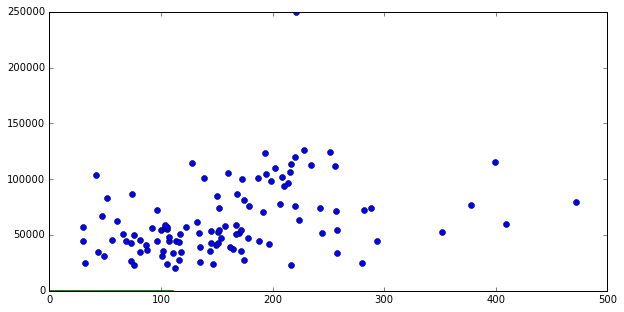

In [47]:
#regression
# fit line to data
linmodel_3 = smf.ols(formula = 'avg ~ med_inc', data = income_clean).fit()

#plot
ax = pl.figure(figsize=(10,5)).add_subplot(111)
ax.plot(income_clean['avg'], income_clean['med_inc'], 'o', label="xxx")

ax.plot(linmodel_3.predict())

#fit summary
linmodel_3.summary()

#### Import shapfile for zipcode boundaries from https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data
Merged income_clean with shapefile in ArcMap, and made preliminary maps in ArcMap

In [48]:
shape_path = "shape_export.shp"
zip_shape = GeoDataFrame.from_file(shape_path)

In [49]:
zip_shape = zip_shape.loc[:,["BBL", "BINs", "County", "ED_Visits", "ZIP", "avg", "med_inc","geometry"]]
zip_shape.head()

,BBL,BINs,County,ED_Visits,ZIP,avg,med_inc,geometry
0,0.000000e+00,0,NaN,0.0,11436.0,0.000000,64005.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,3.012040e+09,3029906,NaN,4909.0,11213.0,43.400000,34701.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,0.000000e+00,0,NaN,0.0,11212.0,0.000000,28207.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,3.013180e+09,3034873,NaN,2840.0,11225.0,113.300000,44911.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,3.053000e+09,3123385,NaN,1146.0,11218.0,103.566667,56120.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [76]:
#exploratory statistics
print zip_shape.ED_Visits.mean()
print zip_shape.ED_Visits.median()
print zip_shape.ED_Visits.min()
print zip_shape.ED_Visits.max()

1009.54580153
0.0
0.0
10391.0


In [77]:
#exploratory statistics
print zip_shape.avg.mean()
print zip_shape.avg.median()
print zip_shape.avg.min()
print zip_shape.avg.max()

73.3092477991
0.0
0.0
472.2


In [78]:
#exploratory statistics
print zip_shape.med_inc.mean()
print zip_shape.med_inc.median()
print zip_shape.med_inc.min()
print zip_shape.med_inc.max()

49495.4045802
48449.0
0.0
250000.0


//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


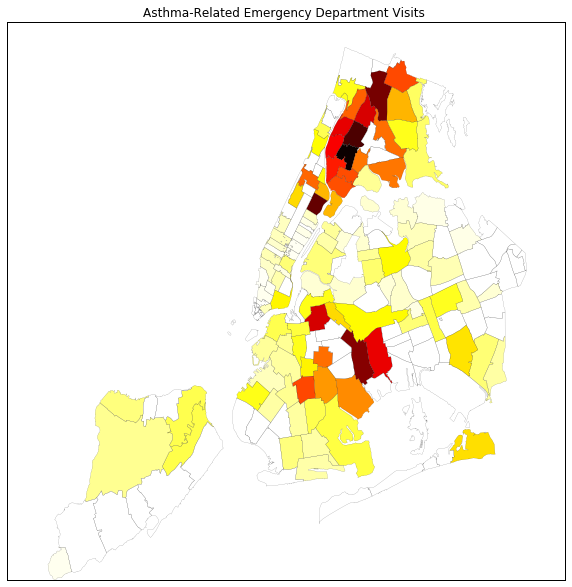

In [50]:
#exploratory maps
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
zip_shape.plot(column='ED_Visits',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Asthma-Related Emergency Department Visits ")

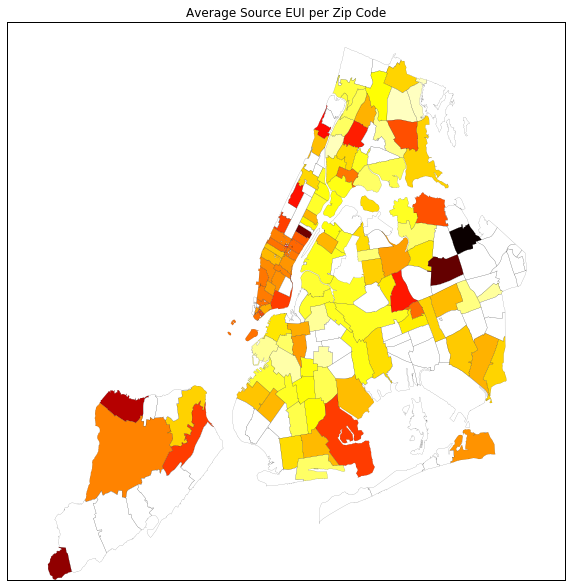

In [51]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
zip_shape.plot(column='avg',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Average Source EUI per Zip Code")

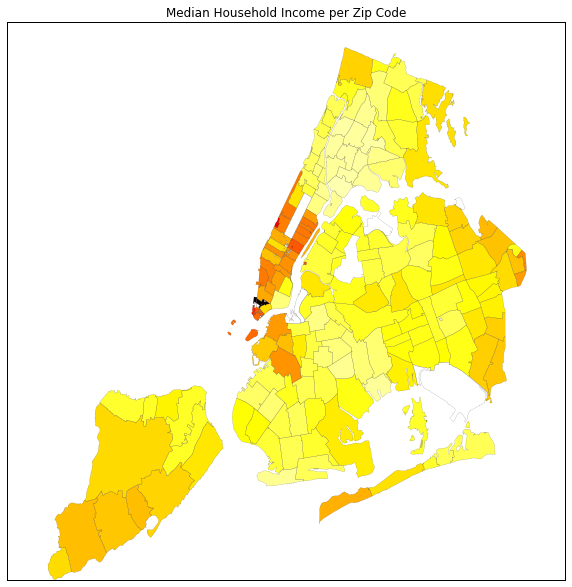

In [52]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
zip_shape.plot(column='med_inc',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Median Household Income per Zip Code")

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
zip_shape.plot(column='weight',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Weighted ")

In [53]:
# perform spatial lag analysis


In [54]:
# using Queen Weights
qW_CT=ps.queen_from_shapefile(shape_path)

('Island ids: ', [27, 28, 67, 95, 96, 105, 109, 110, 119, 130, 135, 142, 184, 185, 186, 189, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 218, 219, 220, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 255, 256, 257, 259])


In [55]:
#matrix of weights
Wmatrix, ids = qW_CT.full()

In [56]:
# row standardize weights
qW_CT.transform = 'r'

('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 184, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 186, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')
('WARNING: ', 196, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 199, ' is an island (n

In [57]:
weights =zip_shape.ED_Visits
weightsLag = ps.lag_spatial(qW_CT, weights)

In [58]:
#create quantiles for mapping
weightsLagQ10 = ps.Quantiles(weightsLag, k=10)
weightsLagQ10

                 Quantiles                  
 
 Lower              Upper              Count
           x[i] <=    0.000               85
   0.000 < x[i] <=  224.500               20
 224.500 < x[i] <=  481.833               26
 481.833 < x[i] <=  789.880               26
 789.880 < x[i] <= 1077.505               26
1077.505 < x[i] <= 1713.920               26
1713.920 < x[i] <= 3441.133               26
3441.133 < x[i] <= 8227.250               27

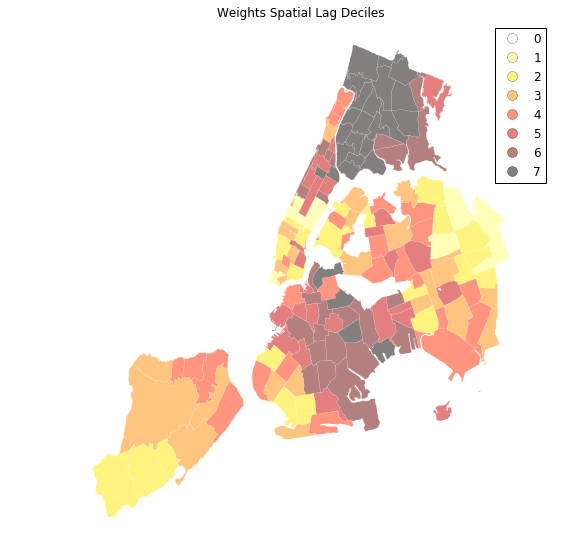

In [59]:
f, ax = plt.subplots(figsize=(9, 9))
zip_shape.assign(cl=weightsLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Weights Spatial Lag Deciles")

In [60]:
#global spatial autocorrelation
b,a = np.polyfit(weights, weightsLag, 1)
b,a 

(0.47716358337087672, 625.3767413179238)

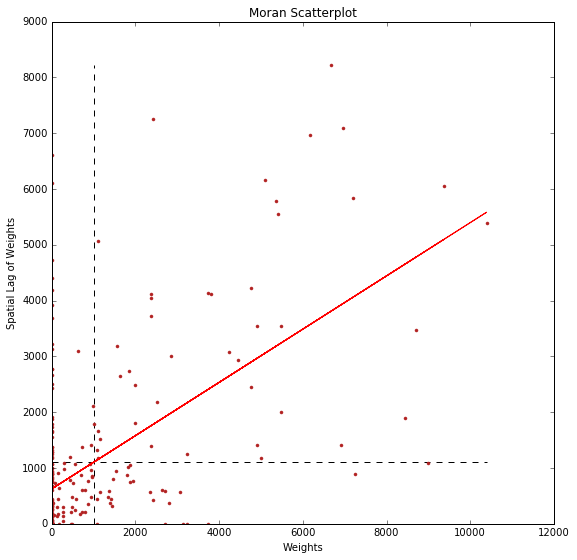

In [61]:
#Moran's I scatterplot
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(weights, weightsLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(weights.mean(), weightsLag.min(), weightsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(weightsLag.mean(), weights.min(), weights.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(weights, a + b*weights, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Weights')
plt.xlabel('Weights')

In [62]:
#moran's I
I_weights = ps.Moran(weights, qW_CT)

In [63]:
I_weights.I, I_weights.p_sim

(0.56472608207477859, 0.001)

Thus, the $I$ statistic is $0.564$ for this data, and has a very small $p$ value. 

In [64]:
#local spatial ac
LMo_weights = ps.Moran_Local(weights, qW_CT,permutations=999)

In [65]:
sigs = weights[LMo_weights.p_sim <= .001]
W_sigs = weightsLag[LMo_weights.p_sim <= .001]
insigs = weights[LMo_weights.p_sim > .001]
W_insigs = weightsLag[LMo_weights.p_sim > .001]

In [66]:
#hot and cold spots
sig = LMo_weights.p_sim < 0.01
hotspots = LMo_weights.q==1 * sig
coldspots = LMo_weights.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 15
Number of Coldspots: 65


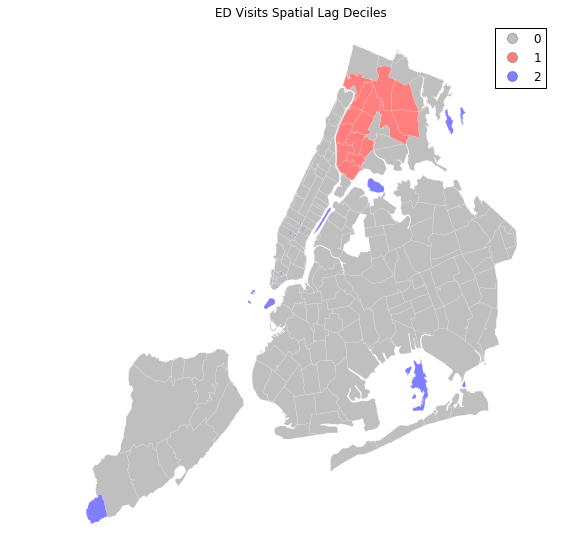

In [67]:
from matplotlib import colors


hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
zip_shape.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("ED Visits Spatial Lag Deciles")